# Visualizing Earnings Based On College Major:
In this project, we'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

## Data dictionary

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* __Rank__ - Rank by median earnings (the dataset is ordered by this column).
* __Majot_code__ - Major code.
* __Major__ - Major description.
* __Major_category__ - Category of major.
* __Total__ - Total number of people with major.
* __Sample_size__ - Sample size (unweighted) of full-time.
* __Men__ - Male graduates.
* __Women__ - Female graduates.
* __ShareWomen__ - Women as share of total.
* __Employed__ - Number employed.
* __Median__ - Median salary of full-time, year-round workers.
* __Low_wage_jobs__ - Number in low-wage service jobs.
* __Full_time__ - Number employed 35 hours or more.
* __Part_time__ - Number employed less than 35 hours.

## Sample of questions:
* Do students in more popular majors make more money?
* How many majors are predominantly male? Predominantly female?
* Which category of majors have the most students?

In [47]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:

import pandas as pd
import matplotlib as plt
recent_grads = pd.read_csv('recent-grads.csv')
print("first row:",recent_grads.iloc[0])

first row: Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [49]:
print("head:",recent_grads.head())
print("tail:",recent_grads.tail())

head:    Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270            

In [50]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [51]:
raw_data_count=recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count=recent_grads.shape[0]
print("Number of rows with na values:",raw_data_count-cleaned_data_count)

Number of rows with na values: 1


we have only one data row with missing value, so we dropped it to have neatly visualized data exploring our majors.

## Scatter Plot
first let's see the scatter plot of our dataset if we can spot trends.

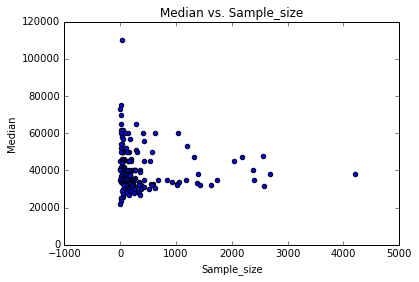

In [52]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter',
                  title='Median vs. Sample_size')

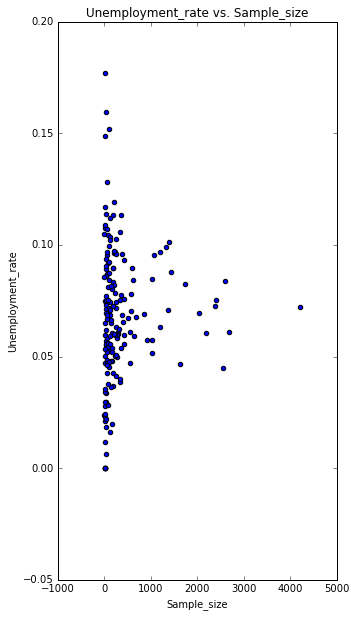

In [53]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter',
                  title='Unemployment_rate vs. Sample_size', figsize=(5,10))

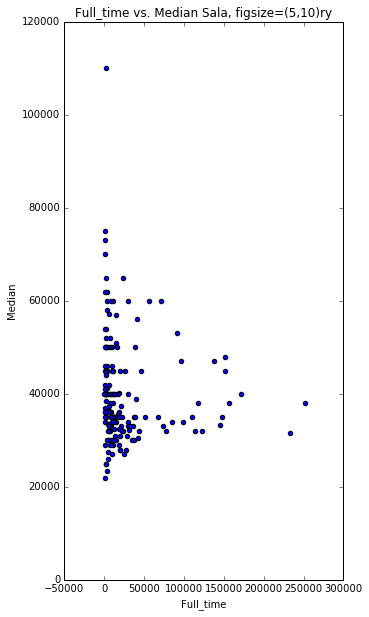

In [54]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter',
                  title='Full_time vs. Median Sala, figsize=(5,10)ry', figsize=(5,10))

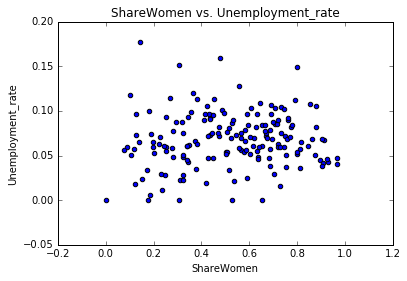

In [55]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter',
                  title='ShareWomen vs. Unemployment_rate')

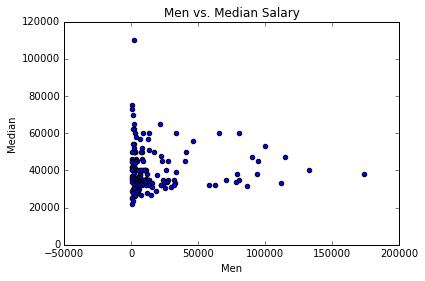

In [56]:
recent_grads.plot(x='Men', y='Median', kind='scatter',
                  title='Men vs. Median Salary')

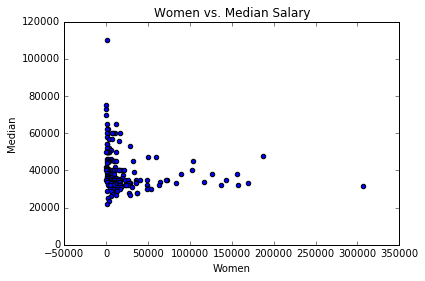

In [57]:
recent_grads.plot(x='Women', y='Median', kind='scatter',
                  title='Women vs. Median Salary')

using the scatter plots we can explore the possible answer for the following questions:
* Do students in more popular majors make more money?
    * there is no up trend between the <mark>Median</mark> salary against <mark>Sample_size</mark>
* Do students that majored in subjects that were majority female make more money?
    * no, actually as number of <mark>Women</mark> increases the <mark>Median</mark> salary decreases.
* Is there any link between the number of full-time employees and median salary?
    * as the number of <mark>Full_time</mark> employees, <mark>Median</mark> seems to be trending downward. which can be explained in partial by demand and supply.

## Histograms
let's peek into Histograms, and see what questions can be explored.

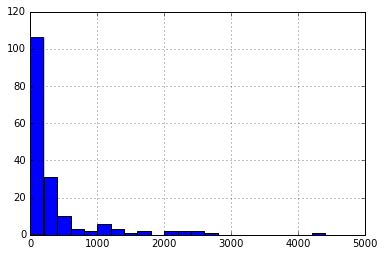

In [58]:
recent_grads['Sample_size'].hist(bins=25,range=(0,5000))

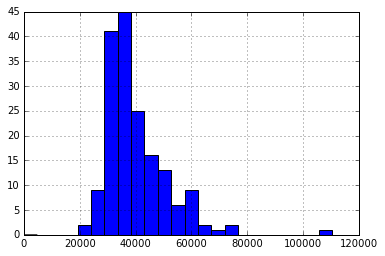

In [59]:
recent_grads['Median'].hist(bins=25,range=(0,120000))

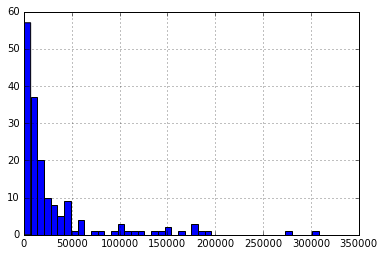

In [60]:
recent_grads['Employed'].hist(bins=50,range=(0,350000))

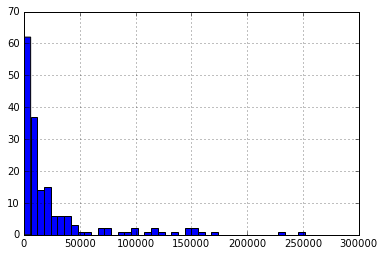

In [61]:
recent_grads['Full_time'].hist(bins=50,range=(0,300000))

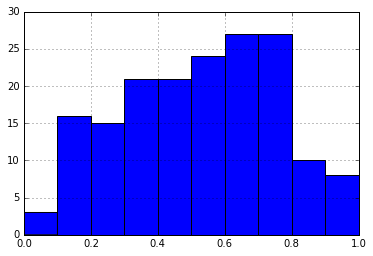

In [62]:
recent_grads['ShareWomen'].hist(bins=10,range=(0,1))

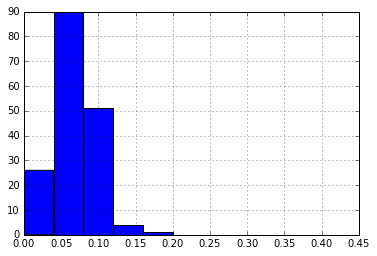

In [63]:
recent_grads['Unemployment_rate'].hist(bins=10,range=(0,0.4))

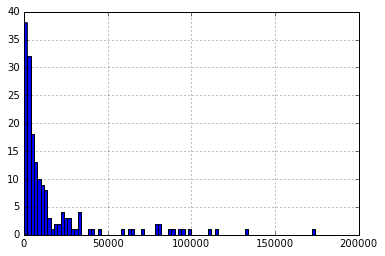

In [64]:
recent_grads['Men'].hist(bins=100,range=(0,200000))

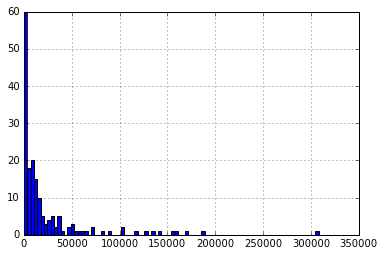

In [65]:
recent_grads['Women'].hist(bins=100,range=(0,350000))

In [66]:
recent_grads.loc[recent_grads['ShareWomen']>=0.5,"ShareWomen"].count()/recent_grads['ShareWomen'].count()

0.5581395348837209

using the Histogram plots we can explore the possible answer for the following questions:
* What percent of majors are predominantly male? Predominantly female?
    * around 44% are predominantly male, while 56% predominantly female.
* What's the most common median salary range?
    * the most comman <mark>Median</mark> Salary is 45k.

## Scatter Matrix Plot
let's combine some of earlier grapgs into one graph. where histograms are on the diagonal plots while the scatter plots off diagonal.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0669787f98>,
      dtype=object)

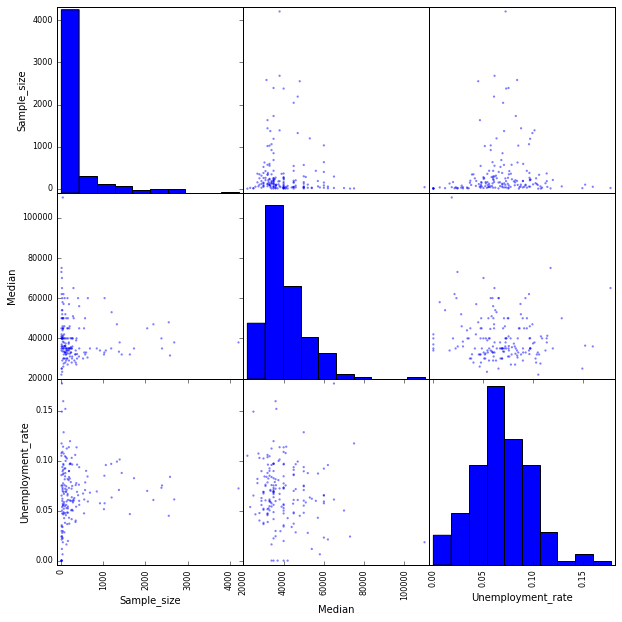

In [67]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']],
               figsize=(10,10))

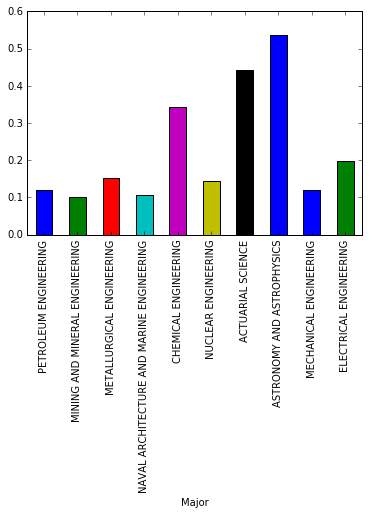

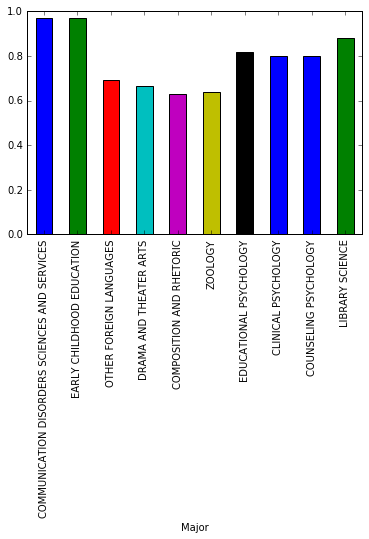

In [68]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen',legend=False)
recent_grads.tail(10).plot.bar(x='Major', y='ShareWomen',legend=False)

<mark>ShareWomen</mark>differs from major to major as shown through the bar plots.

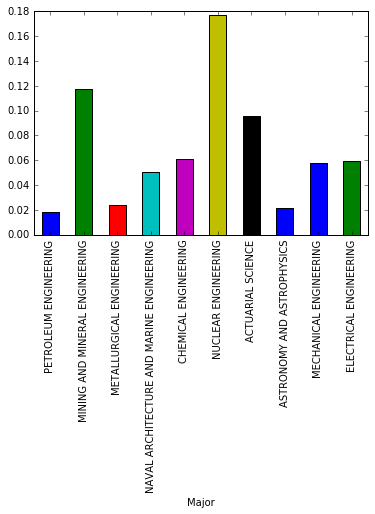

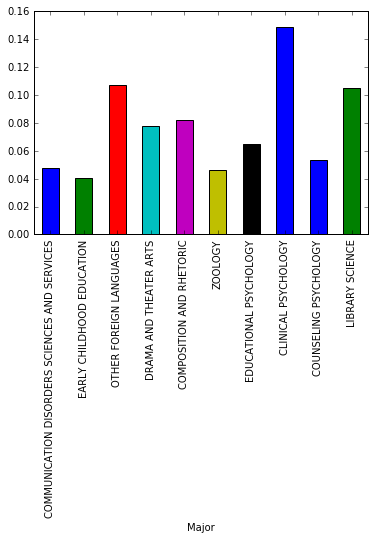

In [69]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate',legend=False)
recent_grads.tail(10).plot.bar(x='Major', y='Unemployment_rate',legend=False)

<mark>Unemployment_rate</mark>differs also from major to major as shown through the bar plots.

## More Visualizations
we will start off with grouped visualization of men and women together in one bar plot, to visualize how ratios vary by major.

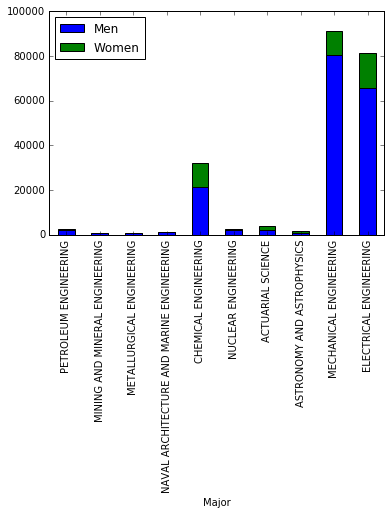

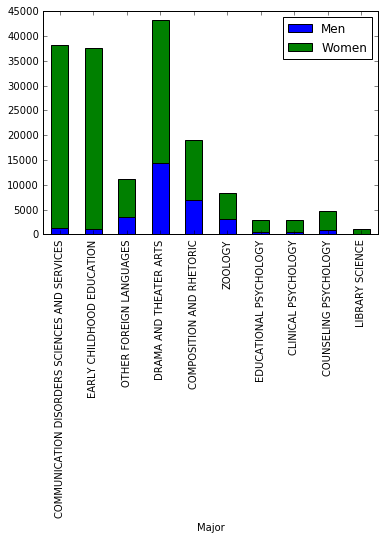

In [72]:
recent_grads[:10].plot.bar(x='Major', y=['Men','Women'],stacked=True)
recent_grads.tail(10).plot.bar(x='Major', y=['Men','Women'],stacked=True)

Engineering majors are mostly dominated by men vs bachelor of arts majors which are dominated by women.

* Exploring distribution for <mark>Median</mark> and <mark>Unemployment_rate</mark>

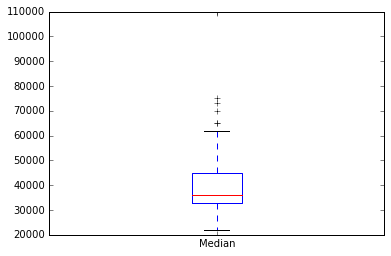

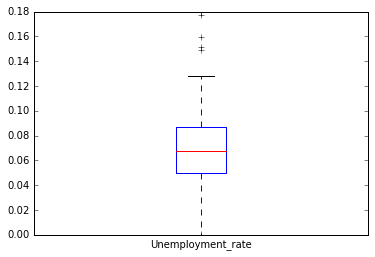

In [75]:
recent_grads.plot.box(y="Median")
recent_grads.plot.box(y="Unemployment_rate")

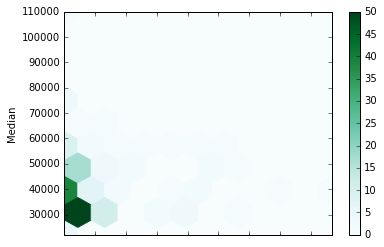

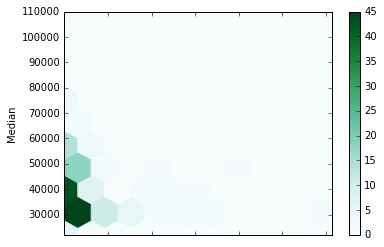

In [81]:
import numpy as np
recent_grads.plot.hexbin(x='Men', y='Median', gridsize=10, reduce_C_function=np.max)
recent_grads.plot.hexbin(x='Women', y='Median', gridsize=10, reduce_C_function=np.max)

In our hexaonal binning graphs we can notice very fast where our density of our points is through color density, to see where median salary are mostly dense.
which looks more neat and intuitive to look at.